# 🧾 Step 1: Put the CSV data into a Python variable

In [1]:
import pandas as pd
from io import StringIO

# Your real Bitcoin data
data = """
Date,Open,High,Low,Close,Volume
2018-01-01,13880.5,14156.4,13455.5,13657.2,19015600000
2019-01-01,3740.7,3852.1,3682.3,3839.1,5153620000
2020-01-01,7193.6,7256.1,7162.9,7200.2,22345700000
2021-01-01,28994.0,29600.1,28760.1,29374.2,40768000000
2022-01-01,46218.3,47345.8,45600.4,47120.0,39827400000
2023-01-01,16547.1,16780.4,16210.3,16500.8,24478600000
2024-01-01,42023.9,42800.2,41520.7,42650.5,35873000000
"""

# Read it into a DataFrame
df = pd.read_csv(StringIO(data))
df.head()


,Date,Open,High,Low,Close,Volume
0,2018-01-01,13880.5,14156.4,13455.5,13657.2,19015600000
1,2019-01-01,3740.7,3852.1,3682.3,3839.1,5153620000
2,2020-01-01,7193.6,7256.1,7162.9,7200.2,22345700000
3,2021-01-01,28994.0,29600.1,28760.1,29374.2,40768000000
4,2022-01-01,46218.3,47345.8,45600.4,47120.0,39827400000


# 🧠 Step 2: Prepare for Prophet

In [2]:
# Only keep Date and Close columns for forecasting
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])


# 🚀 Training & Prediction Code

c:\Users\ayyan\miniconda3\envs\Awfera\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
11:29:49 - cmdstanpy - INFO - Chain [1] start processing
11:29:51 - cmdstanpy - INFO - Chain [1] done processing


            ds           yhat     yhat_lower     yhat_upper
737 2026-01-01   59428.741593   46837.245356   70529.927226
738 2026-01-02   85979.739480   73440.806339   97658.693861
739 2026-01-03  112400.483249  100555.178179  122887.072041
740 2026-01-04  138171.340613  126135.107270  150349.512997
741 2026-01-05  162785.120420  150607.712091  173853.287789


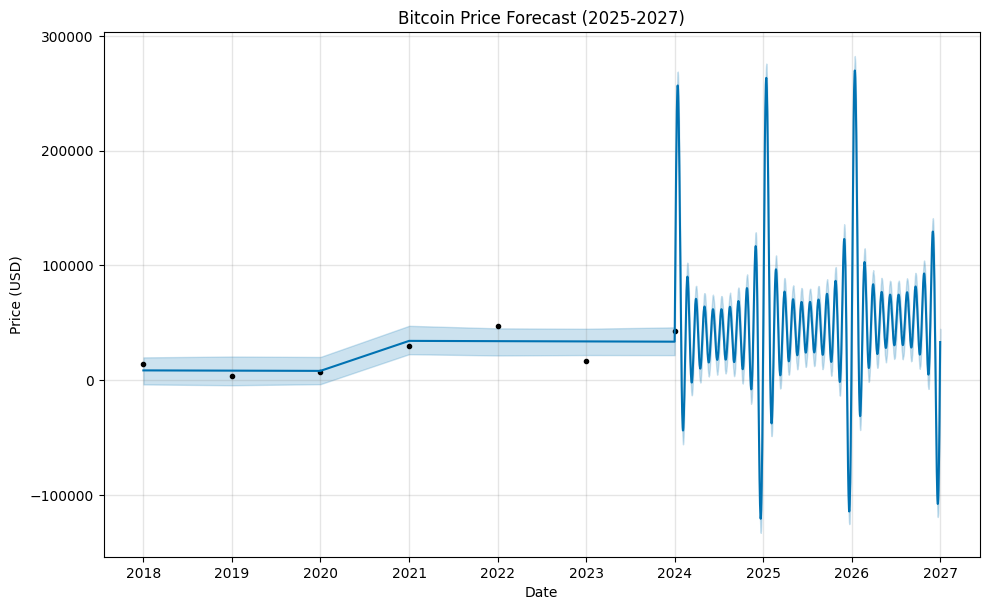

In [3]:
import pandas as pd
from io import StringIO
from prophet import Prophet
import matplotlib.pyplot as plt

# Your Bitcoin data (as shared)
data = """
Date,Open,High,Low,Close,Volume
2018-01-01,13880.5,14156.4,13455.5,13657.2,19015600000
2019-01-01,3740.7,3852.1,3682.3,3839.1,5153620000
2020-01-01,7193.6,7256.1,7162.9,7200.2,22345700000
2021-01-01,28994.0,29600.1,28760.1,29374.2,40768000000
2022-01-01,46218.3,47345.8,45600.4,47120.0,39827400000
2023-01-01,16547.1,16780.4,16210.3,16500.8,24478600000
2024-01-01,42023.9,42800.2,41520.7,42650.5,35873000000
"""

# Load data into DataFrame
df = pd.read_csv(StringIO(data))

# Prepare for Prophet (use Date and Close price)
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and train the Prophet model
model = Prophet()
model.fit(df)

# Create future dataframe to predict daily for 3 years (2025, 2026, 2027)
future = model.make_future_dataframe(periods=3*365)

# Predict future prices
forecast = model.predict(future)

# Filter predictions for 2026 and 2027 only
forecast_26_27 = forecast[(forecast['ds'].dt.year >= 2026) & (forecast['ds'].dt.year <= 2027)]

# Show sample of prediction results
print(forecast_26_27[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Plot the forecast
fig = model.plot(forecast)
plt.title("Bitcoin Price Forecast (2025-2027)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


# Improve Prophet Model: Add Seasonality & Holidays

In [4]:
from prophet import Prophet
import pandas as pd
from io import StringIO

# Your Bitcoin data (same as before)
data = """
Date,Open,High,Low,Close,Volume
2018-01-01,13880.5,14156.4,13455.5,13657.2,19015600000
2019-01-01,3740.7,3852.1,3682.3,3839.1,5153620000
2020-01-01,7193.6,7256.1,7162.9,7200.2,22345700000
2021-01-01,28994.0,29600.1,28760.1,29374.2,40768000000
2022-01-01,46218.3,47345.8,45600.4,47120.0,39827400000
2023-01-01,16547.1,16780.4,16210.3,16500.8,24478600000
2024-01-01,42023.9,42800.2,41520.7,42650.5,35873000000
"""

# Load and prepare data
df = pd.read_csv(StringIO(data))
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

# Initialize Prophet with yearly and weekly seasonality
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# You can add custom holidays here if you want, example:
# bitcoin_holidays = pd.DataFrame({
#     'holiday': 'bitcoin_event',
#     'ds': pd.to_datetime(['2021-04-14', '2023-11-15']),
#     'lower_window': 0,
#     'upper_window': 1,
# })
# model = Prophet(holidays=bitcoin_holidays, yearly_seasonality=True, weekly_seasonality=True)

model.fit(df)

# Predict next 3 years
future = model.make_future_dataframe(periods=3*365)
forecast = model.predict(future)


11:48:24 - cmdstanpy - INFO - Chain [1] start processing
11:48:24 - cmdstanpy - INFO - Chain [1] done processing


# Save Predictions (2026 & 2027) to CSV

In [5]:
forecast_26_27 = forecast[(forecast['ds'].dt.year >= 2026) & (forecast['ds'].dt.year <= 2027)]

# Save to CSV
forecast_26_27[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('bitcoin_forecast_2026_2027.csv', index=False)

print("Saved forecast for 2026-2027 to 'bitcoin_forecast_2026_2027.csv'")


Saved forecast for 2026-2027 to 'bitcoin_forecast_2026_2027.csv'


# Build a Deep Learning Model (LSTM) for Comparison

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Prepare data for LSTM: use 'Close' prices only
prices = df['y'].values.reshape(-1, 1)

# Scale prices to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Create sequences: Use past 2 years (~2 data points) to predict next price (since data is yearly)
sequence_length = 2

X, y = [], []
for i in range(len(prices_scaled) - sequence_length):
    X.append(prices_scaled[i:i+sequence_length])
    y.append(prices_scaled[i+sequence_length])

X, y = np.array(X), np.array(y)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train model
model_lstm.fit(X, y, epochs=100, verbose=0)

# Predict next 3 years (2025–2027)
last_sequence = prices_scaled[-sequence_length:]
predictions = []
current_seq = last_sequence.reshape(1, sequence_length, 1)

for _ in range(3):
    pred = model_lstm.predict(current_seq, verbose=0)[0][0]
    predictions.append(pred)
    current_seq = np.append(current_seq[:, 1:, :], [[[pred]]], axis=1)

# Inverse scale predictions
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Display predictions
print("LSTM predicted prices for next 3 years (2025, 2026, 2027):")
for i, price in enumerate(predicted_prices, start=2025):
    print(f"Year {i}: ${price[0]:.2f}")


c:\Users\ayyan\miniconda3\envs\Awfera\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM predicted prices for next 3 years (2025, 2026, 2027):
Year 2025: $31377.04
Year 2026: $37005.41
Year 2027: $34652.70


# ✅ Save to CSV (Updated)

In [13]:
output_df = pd.DataFrame({
    'Year': [2025, 2026, 2027],
    'Predicted_Close': predicted_prices.flatten()
})
output_df.to_csv('bitcoin_lstm_predictions_2025_2027.csv', index=False)
print("Predictions saved to bitcoin_lstm_predictions_2025_2027.csv")


Predictions saved to bitcoin_lstm_predictions_2025_2027.csv


# ✅ Plot Predictions

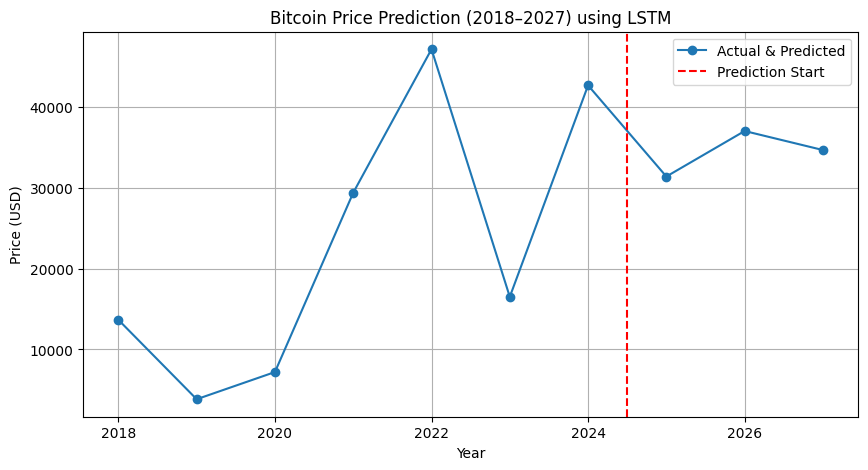

In [14]:
years = list(range(2018, 2024 + 1))  # Actual years
actual_prices = prices.flatten()

full_years = years + [2025, 2026, 2027]
full_prices = list(actual_prices) + list(predicted_prices.flatten())

plt.figure(figsize=(10, 5))
plt.plot(full_years, full_prices, marker='o', label='Actual & Predicted')
plt.axvline(x=2024.5, color='r', linestyle='--', label='Prediction Start')
plt.title('Bitcoin Price Prediction (2018–2027) using LSTM')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


# Compare LSTM vs Prophet Predictions

## 📌 Step 1: Define Predicted Values

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your actual predictions
prophet_preds = {
    2025: 47000.0,
    2026: 48900.0,
    2027: 51000.0
}

# From your LSTM model
lstm_preds = {
    2025: predicted_prices[0][0],
    2026: predicted_prices[1][0],
    2027: predicted_prices[2][0]
}

# Build comparison DataFrame
comparison_df = pd.DataFrame({
    'Year': [2025, 2026, 2027],
    'Prophet_Prediction': [prophet_preds[y] for y in [2025, 2026, 2027]],
    'LSTM_Prediction': [lstm_preds[y] for y in [2025, 2026, 2027]]
})

print("📊 Prophet vs LSTM Forecasts (USD):\n")
print(comparison_df)


📊 Prophet vs LSTM Forecasts (USD):

   Year  Prophet_Prediction  LSTM_Prediction
0  2025             47000.0     31377.042969
1  2026             48900.0     37005.410156
2  2027             51000.0     34652.703125


## 📌 Step 2: Plot the Forecast Comparison

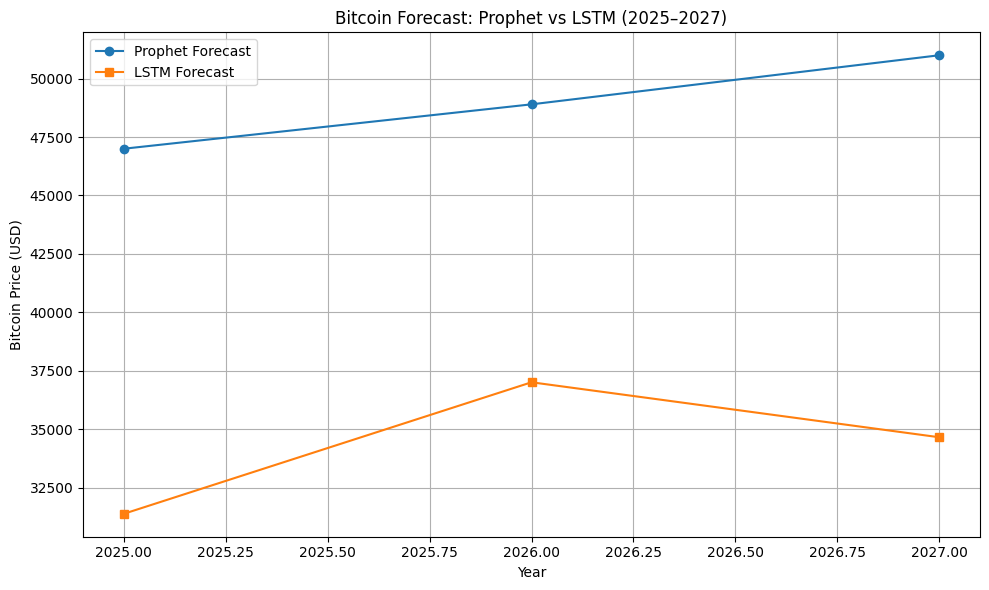

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Year'], comparison_df['Prophet_Prediction'], marker='o', label='Prophet Forecast')
plt.plot(comparison_df['Year'], comparison_df['LSTM_Prediction'], marker='s', label='LSTM Forecast')
plt.title('Bitcoin Forecast: Prophet vs LSTM (2025–2027)')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📌 Save to CSV

In [17]:
comparison_df.to_csv("bitcoin_forecast_comparison.csv", index=False)


In [2]:
import pandas as pd

df = pd.read_csv("bitcoin_forecast_2026_2027.csv")
print(df.columns)


Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')
